In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
from sklearn.datasets import load_diabetes
diabetes =load_diabetes()
df= pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['target']=diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [93]:
X = df.iloc[:, :-1].values
y = df.target.values

In [94]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test =train_test_split(
    X,y,test_size=0.2,random_state=2023
)
lr =LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [95]:
from sklearn.metrics import r2_score,mean_squared_error
pred =lr.predict(X_test)
r2_score(y_test,pred),mean_squared_error(y_test,pred)

(0.5011352464069887, 3490.2509128838997)

2. BMI와 target을 단일회귀를 하고, 산점도와 회귀선을 그리고 이미지를    복사하여 답안지에 붙여 넣으세요.[10]

In [96]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test =train_test_split(
    df.bmi.values.reshape(-1,1),diabetes.target,test_size=0.2,random_state=2023
)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((353, 1), (89, 1), (353,), (89,))

In [97]:
lr =LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [98]:
xs =np.array([-0.1,0.18])
ys=np.dot(lr.coef_[0],xs) + lr.intercept_

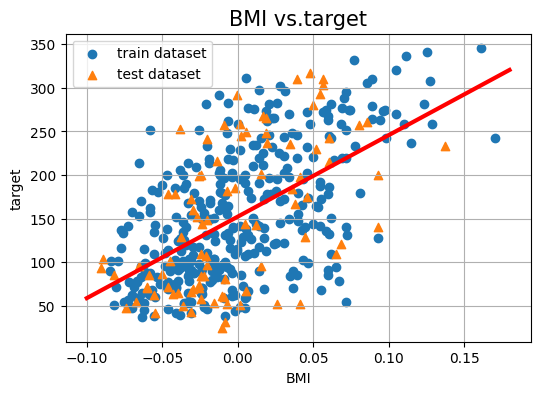

In [99]:
plt.figure(figsize=(6,4))
plt.scatter(X_train,y_train,label ='train dataset')
plt.plot(xs,ys,'r-',lw=3)
plt.scatter(X_test,y_test,marker='^',label='test dataset')
plt.grid(),plt.legend()
plt.xlabel('BMI'),plt.ylabel('target')
plt.title('BMI vs.target',fontsize =15)
plt.show()

In [103]:
X =df.iloc[:,:-1].values  
y=df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(
    df.iloc[:,:-1].values,df.iloc[:,-1].values,stratify=y,
    test_size=0.2 ,random_state=2023
)
lr =LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)
pred_lr =lr.predict(X_test)
r2_lr =r2_score(y_test,pred_lr)
mse_lr =mean_squared_error(y_test,pred_lr)


In [104]:
from sklearn.svm import SVR
svr =SVR()
svr.fit(X_train,y_train)
pred_sv =svr.predict(X_test)
r2_sv = r2_score(y_test,pred_sv)
mse_sv =mean_squared_error(y_test,pred_sv)
r2_sv,mse_sv

(0.24994137049446874, 0.17078413726302363)

In [105]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
r2_rf,mse_rf

(0.29122355555555546, 0.1613844155844156)

In [106]:
from xgboost import XGBRegressor
xgr =XGBRegressor()
xgr.fit(X_train,y_train)
pred_xg =xgr.predict(X_test)
r2_xg = r2_score(y_test,pred_xg)
mse_xg =mean_squared_error(y_test,pred_xg)
r2_xg,mse_xg

(0.1656826000615067, 0.18996938605447225)

In [107]:
from sklearn.linear_model import Ridge
ridge =Ridge()
ridge.fit(X_train,y_train)
pred_rg = ridge.predict(X_test)
r2_rg =r2_score(y_test,pred_rg)
mse_rg =mean_squared_error(y_test,pred_rg)
r2_rg,mse_rg 

(0.3241603994790312, 0.15388488121155472)

In [108]:
from sklearn.linear_model import Lasso
lasso =Lasso(random_state=2023)
lasso.fit(X_train,y_train)
pred_ls =lasso.predict(X_test)
r2_ls =r2_score(y_test,pred_ls)
mse_ls = mean_squared_error(y_test,pred_ls)
r2_ls,mse_ls

(0.22822955866267913, 0.17572779487356774)

In [109]:
print('\t\tLR\tSV\tRF\tXG\tRidge')
print(f'R squared\t{r2_lr:.2f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xg:.4f}\t{r2_rg:.4f}')
print(f'Mean squared E\t{mse_lr:.2f}\t{mse_sv:.2f}\t{mse_rf:.2f}\t{mse_xg:.2f}\t{mse_rg:.2f}')

		LR	SV	RF	XG	Ridge
R squared	0.32	0.2499	0.2912	0.1657	0.3242
Mean squared E	0.15	0.17	0.16	0.19	0.15


1. 각 Feature의 최소값이 0, 최대값이 1이 되도록 MinMaxScaler를 사용하여
   변환하세요.(10)

In [123]:
from sklearn.preprocessing import StandardScaler
df =pd.read_csv('../01.Intro/data/pima-indians-diabetes.csv',skiprows=9,header=None)
df.columns =['P','G','BP','S','I','BMI','D','Age','Target']
X =df.iloc[:,:-1].values 
y=df.iloc[:,-1].values  

In [126]:
from sklearn.preprocessing import MinMaxScaler
df_mm =MinMaxScaler().fit_transform(X)
df_mm

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

2. SVC, KNN, Logistic Regression을 소프트 보팅 방식으로 앙상블 학습을 하되,   SVC의 C 파라메터와 LR의 C 파라메터를 최적화해서 분류를 시도하세요.(20)

In [128]:
from sklearn.preprocessing import StandardScaler
df_std =StandardScaler().fit_transform(X)

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(
    df_std,y,stratify=y,
    test_size=0.2 ,random_state=2023
)

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
lrc =LogisticRegression(random_state=2023)
svc =SVC(random_state=2023,probability=True)
knn =KNeighborsClassifier()

In [131]:
from sklearn.ensemble import VotingClassifier
voc = VotingClassifier(
    estimators=[('LRC',lrc),('SVC',svc),('KNN',knn)],
    voting='soft')

In [132]:
from sklearn.model_selection import GridSearchCV
params ={
    'LRC__C':[0.04,0.05,0.06],
    'SVC__C':[0.5,0.6,0.7]
}
grid_voc =GridSearchCV(voc,params,scoring='accuracy',cv=5)
grid_voc.fit(X_train,y_train)
grid_voc.best_params_
grid_voc.best_estimator_.score(X_test,y_test)

0.7792207792207793

In [133]:
from sklearn.ensemble import RandomForestClassifier
dtc =RandomForestClassifier(random_state=156)
dtc.fit(X_train,y_train)
dtc_pred =dtc.predict(X_test)

In [134]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
accuracy_score(y_test,dtc_pred)

0.7857142857142857

In [135]:
precision_score(y_test,dtc_pred)

0.7142857142857143

In [136]:
recall_score(y_test,dtc_pred)

0.6481481481481481